In [1]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fred = Fred(api_key='cba33361256956afaa259454a226507f')

cpi = fred.get_series('CPIAUCSL') # monthly data
pce = fred.get_series('PCE') # Monthly data
dpi = fred.get_series('DPI') # Every 3 months data

In [3]:
dpi = dpi.resample('ME').ffill() # Makes the quarterly data repeat monthly for the quarter
cpi.index = cpi.index.to_period('M')
pce.index = pce.index.to_period('M') # get rid of the dates bc DPI releases on the last day and cpi and pce release on the first of every month and this
dpi.index = dpi.index.to_period('M') # is a ok approximation as we are looking at monthly snapshots and being off by a little bit shoudl not mess up results

In [4]:
# keeping track of data from the last 50 years 1975-2025
cpi = cpi[cpi.index >= '1975-01']
pce = pce[pce.index >= '1975-01']
dpi = dpi[dpi.index >= '1975-01']
dpi

1975-01     1160.434
1975-02     1160.434
1975-03     1160.434
1975-04     1228.887
1975-05     1228.887
             ...    
2024-09    21662.565
2024-10    21924.638
2024-11    21924.638
2024-12    21924.638
2025-01    22257.733
Freq: M, Length: 601, dtype: float64

In [5]:
cpi_normal = (cpi / cpi.loc['1975-01'] * 100)
pce_normal = (pce / pce.loc['1975-01']* 100)
real_dpi = (dpi / pce) * pce.loc['1975-01']
real_dpi

1975-01    1160.434000
1975-02    1144.248444
1975-03    1142.862316
1975-04    1204.926791
1975-05    1176.663222
              ...     
2025-01    1066.011012
2025-02            NaN
2025-03            NaN
2025-04            NaN
2025-05            NaN
Freq: M, Length: 605, dtype: float64

In [6]:
df = pd.concat([cpi_normal, pce_normal, real_dpi], axis = 1)
df.columns = ['CPI', 'PCE', 'DPI']
df.index = df.index.to_timestamp()

In [7]:
recession_data = fred.get_series('USREC')
recession_data = recession_data[recession_data.index >= '1975-01-01']

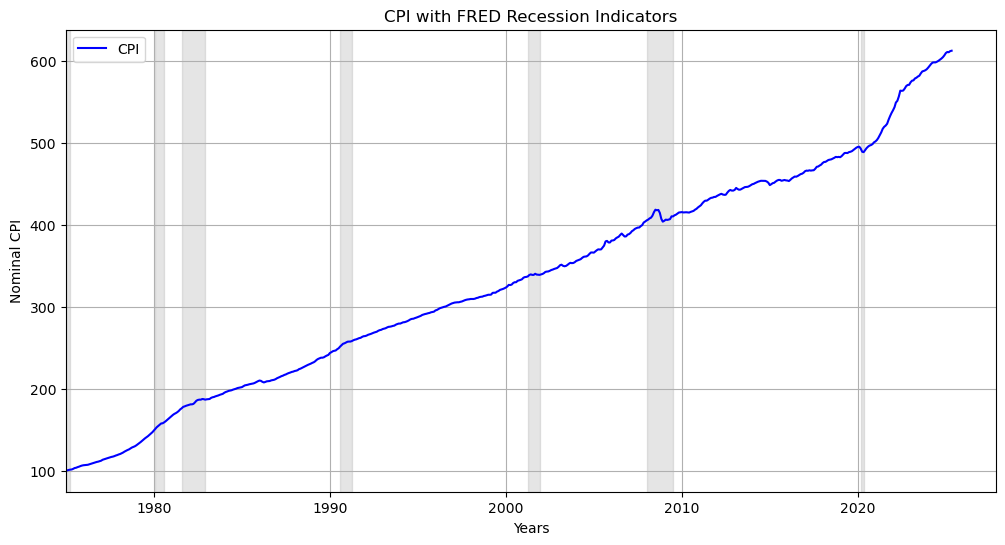

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['CPI'], label='CPI', color='blue')

# Shade only contiguous recession periods
in_recession = False
start = None

for date, is_recession in recession_data.items():
    if is_recession and not in_recession:
        start = date
        in_recession = True
    elif not is_recession and in_recession:
        end = date
        ax.axvspan(start, end, color='grey', alpha=0.2)
        in_recession = False

# If the series ends during a recession
if in_recession:
    ax.axvspan(start, df.index.max(), color='grey', alpha=0.2)

# Plot formatting
ax.set_title('CPI with FRED Recession Indicators')
ax.set_xlabel('Years')
ax.set_ylabel('Nominal CPI')
plt.xlim(left=pd.to_datetime('1975-01-01'))
ax.grid(True)
ax.legend()
plt.show()

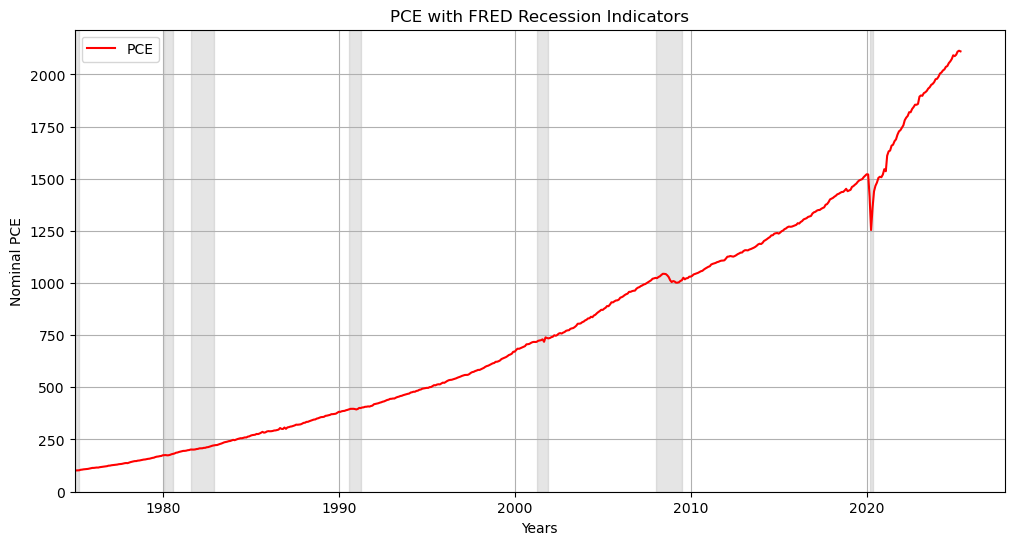

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['PCE'], label='PCE', color='red')

# Shade only contiguous recession periods
in_recession = False
start = None

for date, is_recession in recession_data.items():
    if is_recession and not in_recession:
        start = date
        in_recession = True
    elif not is_recession and in_recession:
        end = date
        ax.axvspan(start, end, color='grey', alpha=0.2)
        in_recession = False

# If the series ends during a recession
if in_recession:
    ax.axvspan(start, df.index.max(), color='grey', alpha=0.2)

# Plot formatting
ax.set_title('PCE with FRED Recession Indicators')
ax.set_xlabel('Years')
ax.set_ylabel('Nominal PCE')
plt.xlim(left=pd.to_datetime('1975-01-01'))
ax.grid(True)
ax.legend()
plt.show()

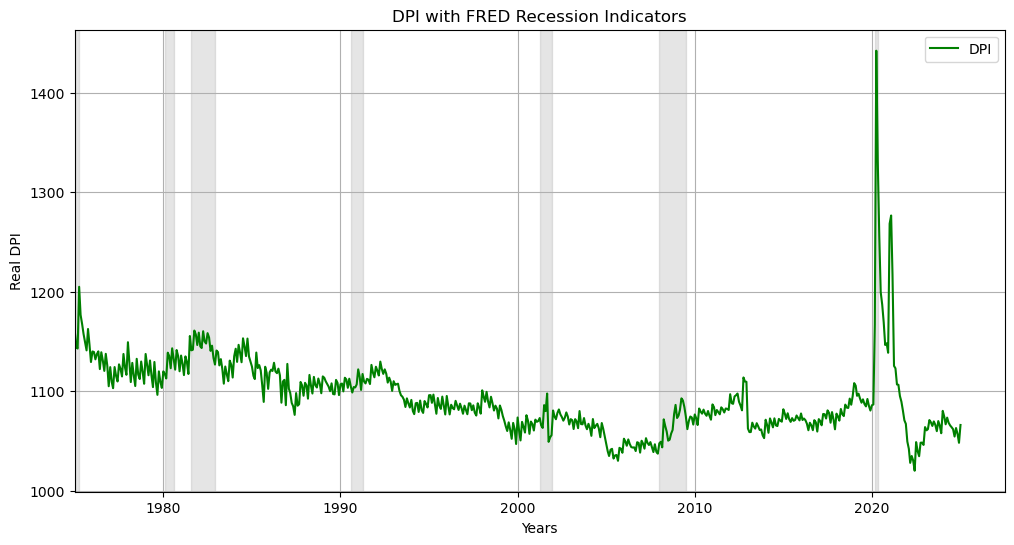

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['DPI'], label='DPI', color='green')

# Shade only contiguous recession periods
in_recession = False
start = None

for date, is_recession in recession_data.items():
    if is_recession and not in_recession:
        start = date
        in_recession = True
    elif not is_recession and in_recession:
        end = date
        ax.axvspan(start, end, color='grey', alpha=0.2)
        in_recession = False

# If the series ends during a recession
if in_recession:
    ax.axvspan(start, df.index.max(), color='grey', alpha=0.2)

# Plot formatting
ax.set_title('DPI with FRED Recession Indicators')
ax.set_xlabel('Years')
ax.set_ylabel('Real DPI')
plt.xlim(left=pd.to_datetime('1975-01-01'))
ax.grid(True)
ax.legend()
plt.show()

In [11]:
df['CPI_pct_change'] = df['CPI'].pct_change(fill_method = None) *100
df['PCE_pct_change'] = df['PCE'].pct_change(fill_method = None) *100
df['DPI_pct_change'] = df['DPI'].pct_change(fill_method = None) *100
df

,CPI,PCE,DPI,CPI_pct_change,PCE_pct_change,DPI_pct_change
1975-01-01,100.000000,100.000000,1160.434000,NaN,NaN,NaN
1975-02-01,100.573614,101.414514,1144.248444,0.573614,1.414514,-1.394785
1975-03-01,100.956023,101.537515,1142.862316,0.380228,0.121286,-0.121139
1975-04-01,101.338432,101.988520,1204.926791,0.378788,0.444175,5.430617
1975-05-01,101.529637,104.438294,1176.663222,0.188679,2.402010,-2.345667
...,...,...,...,...,...,...
2025-01-01,610.107075,2087.945879,1066.011012,0.466935,-0.186691,1.709154
2025-02-01,611.424474,2094.741697,NaN,0.215929,0.325479,NaN
2025-03-01,611.118547,2109.317343,NaN,-0.050035,0.695821,NaN
2025-04-01,612.468451,2113.776138,NaN,0.220891,0.211386,NaN


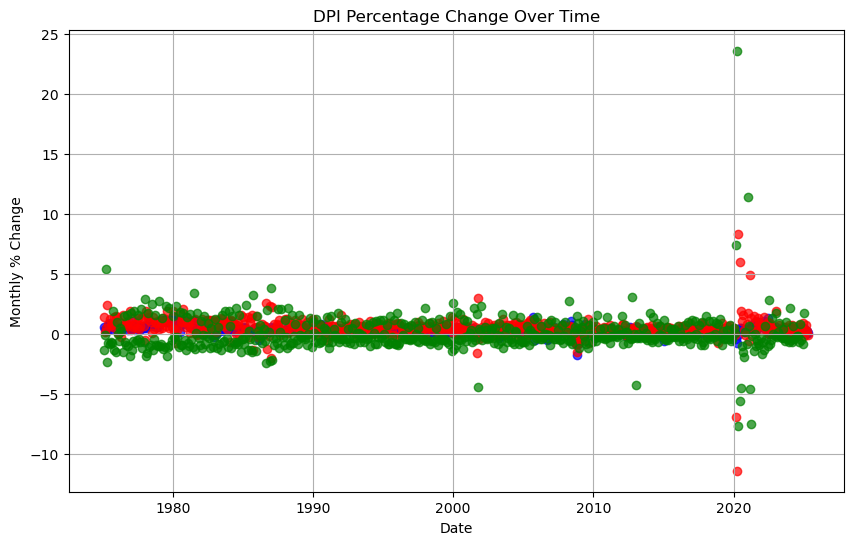

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['CPI_pct_change'], color='blue', alpha=0.7)
plt.scatter(df.index, df['PCE_pct_change'], color='red', alpha=0.7)
plt.scatter(df.index, df['DPI_pct_change'], color='green', alpha=0.7)
plt.title('DPI Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly % Change')
plt.grid(True)
plt.show()
#The visualization shows most of the time dpi and PCE and CPI are on the opposite side of the x axis when looking a change each month.

In [13]:
corr_cpi_pce = df[['CPI_pct_change', 'PCE_pct_change']].corr()
corr_cpi_dpi = df[['CPI_pct_change', 'DPI_pct_change']].corr()
corr_pce_dpi = df[['PCE_pct_change', 'DPI_pct_change']].corr()
print(corr_cpi_pce)
print(corr_cpi_dpi)
#See a strong negative correlation between PCE and DPI of 0.7
print(corr_pce_dpi)

                CPI_pct_change  PCE_pct_change
CPI_pct_change        1.000000        0.298136
PCE_pct_change        0.298136        1.000000
                CPI_pct_change  DPI_pct_change
CPI_pct_change        1.000000       -0.137014
DPI_pct_change       -0.137014        1.000000
                PCE_pct_change  DPI_pct_change
PCE_pct_change        1.000000       -0.695876
DPI_pct_change       -0.695876        1.000000


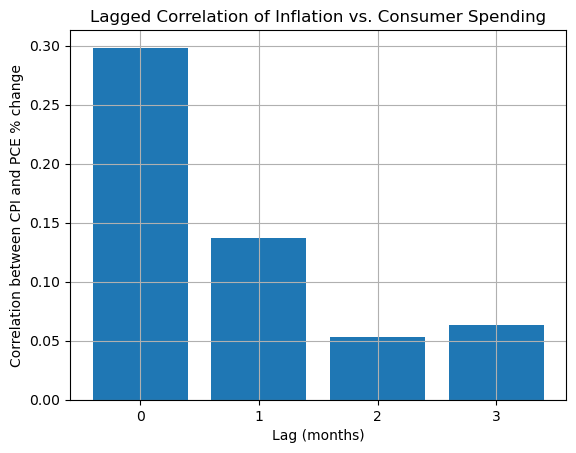

In [14]:
lags = [0, 1, 2, 3]
corrs = []

for lag in lags:
    if lag == 0:
        corr = df[['CPI_pct_change', 'PCE_pct_change']].corr().iloc[0,1]
    else:
        corr = df.assign(CPI_lagged=df['CPI_pct_change'].shift(lag))[
            ['CPI_lagged', 'PCE_pct_change']].corr().iloc[0,1]
    corrs.append(corr)

plt.bar(lags, corrs)
plt.xticks(lags)
plt.xlabel("Lag (months)")
plt.ylabel("Correlation between CPI and PCE % change")
plt.title("Lagged Correlation of Inflation vs. Consumer Spending")
plt.grid(True)
plt.show()

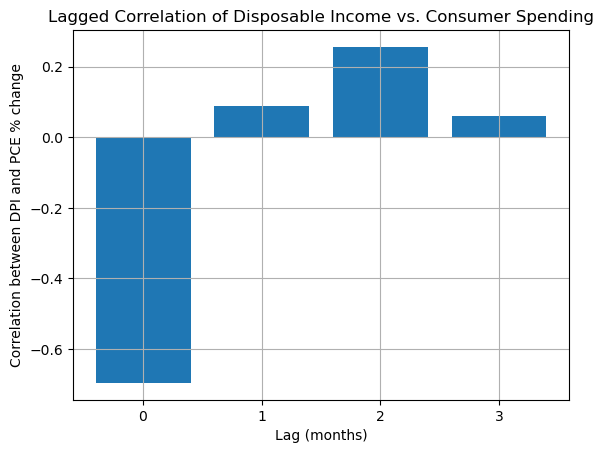

In [15]:
corrs = []
for lag in lags:
    if lag == 0:
        corr = df[['DPI_pct_change','PCE_pct_change']].corr().iloc[0,1]
    else:
        corr = df.assign(DPI_Lagged = df['DPI_pct_change'].shift(lag))[
            ['DPI_Lagged', 'PCE_pct_change']].corr().iloc[0,1]
    corrs.append(corr)
plt.bar(lags, corrs)
plt.xticks(lags)
plt.xlabel("Lag (months)")
plt.ylabel("Correlation between DPI and PCE % change")
plt.title("Lagged Correlation of Disposable Income vs. Consumer Spending")
plt.grid(True)
plt.show()

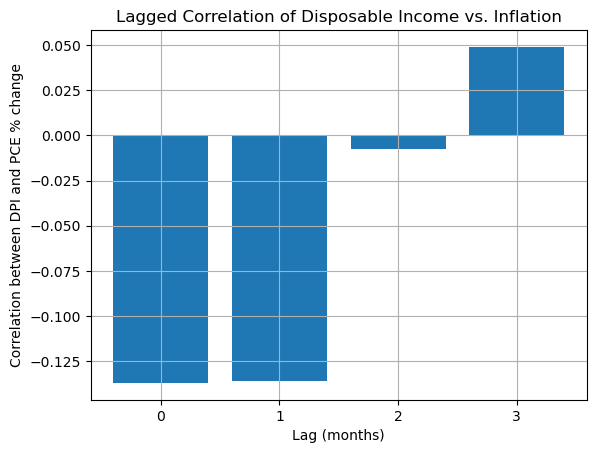

In [16]:
corrs = []
for lag in lags:
    if lag == 0:
        corr = df[['DPI_pct_change','CPI_pct_change']].corr().iloc[0,1]
    else:
        corr = df.assign(DPI_Lagged = df['DPI_pct_change'].shift(lag))[
            ['DPI_Lagged', 'CPI_pct_change']].corr().iloc[0,1]
    corrs.append(corr)
plt.bar(lags, corrs)
plt.xticks(lags)
plt.xlabel("Lag (months)")
plt.ylabel("Correlation between DPI and PCE % change")
plt.title("Lagged Correlation of Disposable Income vs. Inflation")
plt.grid(True)
plt.show()

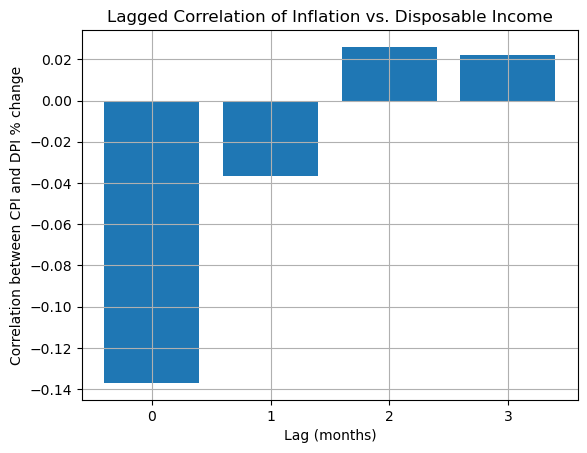

In [17]:
corrs = []
for lag in lags:
    if lag == 0:
        corr = df[['CPI_pct_change','DPI_pct_change']].corr().iloc[0,1]
    else:
        corr = df.assign(CPI_Lagged = df['CPI_pct_change'].shift(lag))[
            ['CPI_Lagged', 'DPI_pct_change']].corr().iloc[0,1]
    corrs.append(corr)
plt.bar(lags, corrs)
plt.xticks(lags)
plt.xlabel("Lag (months)")
plt.ylabel("Correlation between CPI and DPI % change")
plt.title("Lagged Correlation of Inflation vs. Disposable Income")
plt.grid(True)
plt.show()

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

In [19]:
df_granger = df[['CPI_pct_change','DPI_pct_change']].dropna()
print(grangercausalitytests(df_granger, maxlag = 3, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3407  , p=0.1266  , df_denom=596, df_num=1
ssr based chi2 test:   chi2=2.3525  , p=0.1251  , df=1
likelihood ratio test: chi2=2.3479  , p=0.1255  , df=1
parameter F test:         F=2.3407  , p=0.1266  , df_denom=596, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1998  , p=0.0154  , df_denom=593, df_num=2
ssr based chi2 test:   chi2=8.4705  , p=0.0145  , df=2
likelihood ratio test: chi2=8.4110  , p=0.0149  , df=2
parameter F test:         F=4.1998  , p=0.0154  , df_denom=593, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9607  , p=0.0082  , df_denom=590, df_num=3
ssr based chi2 test:   chi2=12.0232 , p=0.0073  , df=3
likelihood ratio test: chi2=11.9037 , p=0.0077  , df=3
parameter F test:         F=3.9607  , p=0.0082  , df_denom=590, df_num=3
{1: ({'ssr_ftest': (2.3407017360326052, 0.12656332815167715, 596.0, 1), 'ssr_chi2test': (2.352

C:\Users\ethan\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [20]:
df_granger = df[['PCE_pct_change','CPI_pct_change']].dropna()
print(grangercausalitytests(df_granger, maxlag = 3, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.5342  , p=0.0036  , df_denom=600, df_num=1
ssr based chi2 test:   chi2=8.5768  , p=0.0034  , df=1
likelihood ratio test: chi2=8.5164  , p=0.0035  , df=1
parameter F test:         F=8.5342  , p=0.0036  , df_denom=600, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.4431  , p=0.0001  , df_denom=597, df_num=2
ssr based chi2 test:   chi2=19.0444 , p=0.0001  , df=2
likelihood ratio test: chi2=18.7494 , p=0.0001  , df=2
parameter F test:         F=9.4431  , p=0.0001  , df_denom=597, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.8077  , p=0.0002  , df_denom=594, df_num=3
ssr based chi2 test:   chi2=20.6637 , p=0.0001  , df=3
likelihood ratio test: chi2=20.3164 , p=0.0001  , df=3
parameter F test:         F=6.8077  , p=0.0002  , df_denom=594, df_num=3
{1: ({'ssr_ftest': (8.534155957910523, 0.0036165101217355247, 600.0, 1), 'ssr_chi2test': (8.57

C:\Users\ethan\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [21]:
df_granger = df[['PCE_pct_change','DPI_pct_change']].dropna()
print(grangercausalitytests(df_granger, maxlag = 3, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.2689 , p=0.0000  , df_denom=596, df_num=1
ssr based chi2 test:   chi2=25.3961 , p=0.0000  , df=1
likelihood ratio test: chi2=24.8725 , p=0.0000  , df=1
parameter F test:         F=25.2689 , p=0.0000  , df_denom=596, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=26.8836 , p=0.0000  , df_denom=593, df_num=2
ssr based chi2 test:   chi2=54.2206 , p=0.0000  , df=2
likelihood ratio test: chi2=51.9016 , p=0.0000  , df=2
parameter F test:         F=26.8836 , p=0.0000  , df_denom=593, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.8324 , p=0.0000  , df_denom=590, df_num=3
ssr based chi2 test:   chi2=72.3455 , p=0.0000  , df=3
likelihood ratio test: chi2=68.2868 , p=0.0000  , df=3
parameter F test:         F=23.8324 , p=0.0000  , df_denom=590, df_num=3
{1: ({'ssr_ftest': (25.26888107230893, 6.604524394017049e-07, 596.0, 1), 'ssr_chi2test': (25.3

C:\Users\ethan\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [22]:
df_var = df[['PCE_pct_change', 'CPI_pct_change']].dropna()
n_obs = 12
train, test = df_var[:-n_obs], df_var[-n_obs:]

In [23]:
model = VAR(train)
results = model.fit(maxlags = 3, ic = 'aic' )
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Jul, 2025
Time:                     12:52:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.08647
Nobs:                     589.000    HQIC:                  -3.15000
Log likelihood:          -717.894    FPE:                  0.0411495
AIC:                     -3.19054    Det(Omega_mle):       0.0401886
--------------------------------------------------------------------
Results for equation PCE_pct_change
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.448086         0.057853            7.745           0.000
L1.PCE_pct_change         0.036894         0.043024            0.858           0.391
L1.CPI_pct_change         0.548768 

In [24]:
lag_order = results.k_ar
forecast_input = train.values[-lag_order:]

forecast = results.forecast( y = forecast_input, steps = n_obs)
forecast_df = pd.DataFrame(forecast, index = test.index, columns =['PCE_forecast', 'CPI_forecast'])

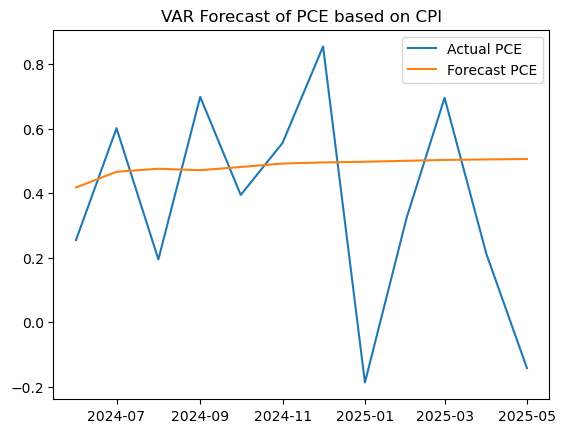

In [25]:
plt.plot(test.index, test['PCE_pct_change'], label='Actual PCE')
plt.plot(test.index, forecast_df['PCE_forecast'], label='Forecast PCE')
plt.legend()
plt.title("VAR Forecast of PCE based on CPI")
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['PCE_pct_change'], forecast_df['PCE_forecast']))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.34


In [73]:
# Add recession dummy directly to your DataFrame
recession_data.name = 'recession'
train_with_rec = train.join(recession_data)
train_with_rec['recession'] = train_with_rec['recession'].fillna(0)

# Now include recession in your VAR model
model = VAR(train_with_rec)
results = model.fit(maxlags=lag_order)

# Forecasting (recession needs to be included in forecast input)
forecast_input = train_with_rec.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=n_obs)
forecast_df = pd.DataFrame(forecast, index = test.index, columns =['PCE_forecast', 'CPI_forecast', 'Recession'])
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Jul, 2025
Time:                     13:11:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.05513
Nobs:                     589.000    HQIC:                  -7.19125
Log likelihood:          -333.854    FPE:                0.000690479
AIC:                     -7.27814    Det(Omega_mle):     0.000656471
--------------------------------------------------------------------
Results for equation PCE_pct_change
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.467332         0.058140            8.038           0.000
L1.PCE_pct_change        -0.038029         0.044520           -0.854           0.393
L1.CPI_pct_change         0.607701 

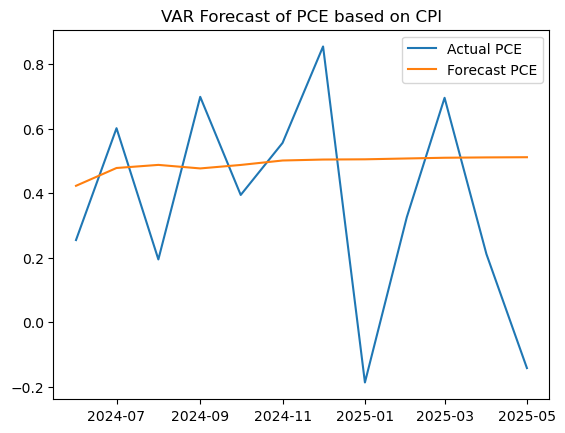

In [77]:
plt.plot(test.index, test['PCE_pct_change'], label='Actual PCE')
plt.plot(test.index, forecast_df['PCE_forecast'], label='Forecast PCE')
plt.legend()
plt.title("VAR Forecast of PCE based on CPI")
plt.show()


In [67]:
# Compare models with and without recession data
print("With recession data:")
print(results.aic, results.bic)

# Compare to original model without recession
original_model = VAR(train).fit(maxlags=lag_order)
print("Without recession data:")
print(original_model.aic, original_model.bic)

With recession data:
-7.278135032064899 -7.055125209468043
Without recession data:
-3.1905445550895135 -3.0864733045443145
